# Backtesting ML Classification-Based

![](src/res_classification.png)

## Load the model

In [185]:
import pickle

In [186]:
with open('models/model_dt_classification.pkl', 'rb') as f:
    model_dt = pickle.load(f)

In [187]:
model_dt

DecisionTreeClassifier(max_depth=5)

## Load the data

In [188]:
import pandas as pd

df = pd.read_excel('data/Microsoft_LinkedIn_Processed.xlsx', index_col=0, parse_dates=['Date'])
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800,1.549141,UP
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400,0.321694,UP
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100,1.286125,UP
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900,-0.478620,DOWN
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700,-0.159793,DOWN
...,...,...,...,...,...,...,...
2023-05-19,316.739990,318.750000,316.369995,318.339996,27529500,0.884238,UP
2023-05-22,318.600006,322.589996,318.010010,321.179993,24115700,-1.877810,DOWN
2023-05-23,320.029999,322.720001,315.250000,315.260010,30797200,-0.449260,DOWN


## Backtesting.py Library

### Create your Strategy Class

In [189]:
from backtesting import Backtest,  Strategy

In [190]:
# Backtest(???)

#### Simulate the prediction for the last observation

In [191]:
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800,1.549141,UP
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400,0.321694,UP
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100,1.286125,UP
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900,-0.478620,DOWN
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700,-0.159793,DOWN
...,...,...,...,...,...,...,...
2023-05-19,316.739990,318.750000,316.369995,318.339996,27529500,0.884238,UP
2023-05-22,318.600006,322.589996,318.010010,321.179993,24115700,-1.877810,DOWN
2023-05-23,320.029999,322.720001,315.250000,315.260010,30797200,-0.449260,DOWN


#### Write the prediction process in the Strategy class

In [192]:
df_explanatory = df.drop(columns=['change_tomorrow', 'change_tomorrow_direction'])

In [193]:
model_dt.predict(X=df_explanatory)

array(['DOWN', 'DOWN', 'DOWN', ..., 'DOWN', 'DOWN', 'DOWN'], dtype=object)

In [194]:
explanatory_today = df_explanatory.iloc[[-1],:]

In [195]:
forecast_tomorrow = model_dt.predict(explanatory_today)[0]

In [196]:
class ClassificationUP(Strategy):
    def init(self):
        self.model = model_dt

    def next(self):
        explanatory_today = df_explanatory.iloc[[-1],:]
        forecast_tomorrow = model_dt.predict(explanatory_today)[0]
        
        # conditions to sell or buy

#### Calculate Purchase Recommendation

##### Buy if it goes up

In [197]:
list_buy = []

In [198]:
for direction_tomorrow in df.change_tomorrow_direction:
    if direction_tomorrow == 'UP':
        list_buy.append(1)
    else:
        list_buy.append(0)

In [199]:
df['buy'] = list_buy

In [200]:
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction,buy
Date,,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800,1.549141,UP,1
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400,0.321694,UP,1
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100,1.286125,UP,1
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900,-0.478620,DOWN,0
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700,-0.159793,DOWN,0
...,...,...,...,...,...,...,...,...
2023-05-19,316.739990,318.750000,316.369995,318.339996,27529500,0.884238,UP,1
2023-05-22,318.600006,322.589996,318.010010,321.179993,24115700,-1.877810,DOWN,0
2023-05-23,320.029999,322.720001,315.250000,315.260010,30797200,-0.449260,DOWN,0


##### Buy if it goes and sell if down

> You can only sell if you have already bought

In [201]:
list_buy_sell = []
already_bought = False

In [202]:
for direction_tomorrow in df.change_tomorrow_direction:
    if direction_tomorrow == 'UP' and already_bought == False:
        list_buy_sell.append(1)
        already_bought = True
    elif direction_tomorrow == 'DOWN' and already_bought == True:
        list_buy_sell.append(-1)
        already_bought = False
    else:
        list_buy_sell.append(0)

In [203]:
df['buy_sell'] = list_buy_sell

In [204]:
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction,buy,buy_sell
Date,,,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800,1.549141,UP,1,1
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400,0.321694,UP,1,0
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100,1.286125,UP,1,0
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900,-0.478620,DOWN,0,-1
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700,-0.159793,DOWN,0,0
...,...,...,...,...,...,...,...,...,...
2023-05-19,316.739990,318.750000,316.369995,318.339996,27529500,0.884238,UP,1,1
2023-05-22,318.600006,322.589996,318.010010,321.179993,24115700,-1.877810,DOWN,0,-1
2023-05-23,320.029999,322.720001,315.250000,315.260010,30797200,-0.449260,DOWN,0,0


#### Add conditions to the strategy

In [205]:
class SimpleClassificationUD(Strategy):
    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[-1:, :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        # conditions to sell or buy
        if forecast_tomorrow == 'UP' and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow == 'DOWN' and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

### Define initial conditions

In [206]:
bt = Backtest(df_explanatory, SimpleClassificationUD,
              cash=10000, commission=.002, exclusive_orders=True)

### Run backtesting

In [207]:
results = bt.run()

### Interpret backtesting results

In [208]:
results.to_frame(name='Values').loc[:'Return [%]']

,Values
Start,2016-12-08 00:00:00
End,2023-05-25 00:00:00
Duration,2359 days 00:00:00
Exposure Time [%],99.753998
Equity Final [$],166589.404428
Equity Peak [$],205562.551856
Return [%],1565.894044


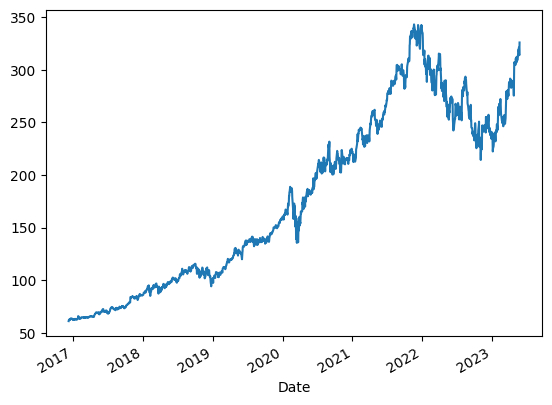

In [209]:
df.Close.plot();

## Practice to master the knowledge

Work on the challenge with another dataset:

1. Learn the <a>mental models</a> to solve the challenge faster.
2. Complete the <a href="03C_Backtesting ML Classification-Based.ipynb">notebook</a>.